<a href="https://colab.research.google.com/github/dorigonato/Calculo_de_Metricas_de_Avaliacao_de_Aprendizado/blob/main/Calculo_de_Metricas_de_Avaliacao_de_Aprendizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tamanho de y_true: 998, Tamanho de y_scores: 998
Verdadeiros Positivos (VP): 0 (0.00%)
Verdadeiros Negativos (VN): 5 (0.50%)
Falsos Positivos (FP): 3 (0.30%)
Falsos Negativos (FN): 990 (99.20%)


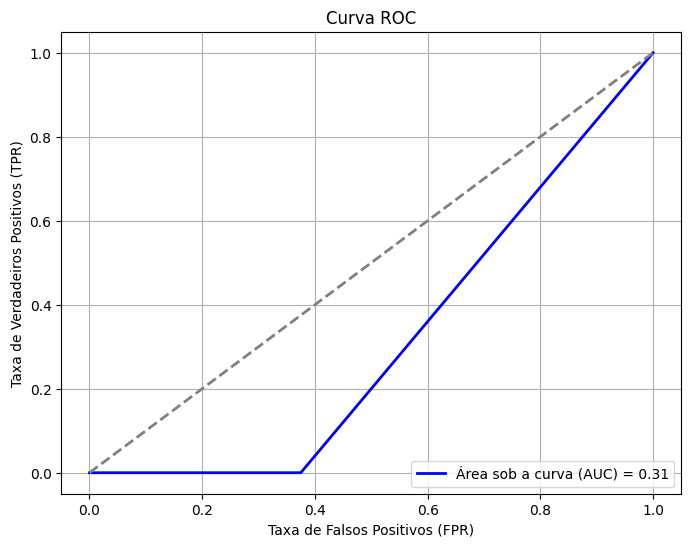

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Defina a matriz de confusão
confusion_matrix = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0.99, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0.98, 0.01, 0, 0, 0, 0.01, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0.99, 0, 0, 0, 0, 0.01],
    [0, 0, 0, 0.02, 0, 0.98, 0, 0, 0, 0],
    [0.01, 0, 0, 0, 0, 0, 0.99, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0.01, 0, 0, 0, 0, 0.99, 0],
    [0, 0, 0, 0, 0, 0, 0, 0.01, 0, 0.98]
])

# Escalar a matriz para inteiros
scale_factor = 100
scaled_confusion_matrix = (confusion_matrix * scale_factor).astype(int)

# Gerar dados simulados com base na matriz
y_true = []
y_scores = []

for i in range(scaled_confusion_matrix.shape[0]):
    for j in range(scaled_confusion_matrix.shape[1]):
        count = scaled_confusion_matrix[i, j]
        y_true.extend([1 if i == j else 0] * count)  # Verdadeiros se i == j
        y_scores.extend([1 if j > i else 0] * count)  # Predição maior para classes "posteriores"

# Garantir que temos arrays numpy
y_true = np.array(y_true)
y_scores = np.array(y_scores)

# Verificar tamanhos consistentes
print(f"Tamanho de y_true: {len(y_true)}, Tamanho de y_scores: {len(y_scores)}")

# Gerar a curva ROC
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Calcular VP, VN, FP e FN
VP = np.sum((y_true == 1) & (y_scores == 1))
VN = np.sum((y_true == 0) & (y_scores == 0))
FP = np.sum((y_true == 0) & (y_scores == 1))
FN = np.sum((y_true == 1) & (y_scores == 0))

# Total de amostras
total_samples = len(y_true)

# Calcular os valores em porcentagem
VP_percent = (VP / total_samples) * 100
VN_percent = (VN / total_samples) * 100
FP_percent = (FP / total_samples) * 100
FN_percent = (FN / total_samples) * 100

# Exibir os valores calculados
print(f"Verdadeiros Positivos (VP): {VP} ({VP_percent:.2f}%)")
print(f"Verdadeiros Negativos (VN): {VN} ({VN_percent:.2f}%)")
print(f"Falsos Positivos (FP): {FP} ({FP_percent:.2f}%)")
print(f"Falsos Negativos (FN): {FN} ({FN_percent:.2f}%)")

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Área sob a curva (AUC) = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()
